# Machine Learning Galaxy Morphologies

Your task is to predict the type of galaxies based on a number of measurements and calculations about the images of the galaxies.  This is similar to the [Galaxy Zoo](http://zoo1.galaxyzoo.org/) project we discussed in class, but rather than starting from the images themselves, we are starting with some properties of the galaxies measured from the images.

The data are fully described in [Fischer et al (2019)](https://arxiv.org/abs/1811.02580), a recent paper by several U. Penn researchers, including Helena Dominguez-Sanchez, whom you met in class on April 17.
Don't worry.  You don't need to read that paper to do this project.  Helena explained the important aspects of the data in class.  (Her slides are available on [canvas](https://canvas.upenn.edu/files/76244434/).)  But if you feel inspired to read more about it, please do take a look at the paper.

The Fischer et al paper describes quite a lot of measurements based on different kinds of fits to the images.  We have extracted a subset of the measurements into a smaller catalog, which should be easier for you to work with.  Specifically, we selected columns related to the bulge + disk decomposition of the galaxy (called SE for Sersic + Exponential in the paper).

The columns in this catalog are:

* id = A numeric ID identifying the galaxy
* gal_type = Which type of galaxy this is.  We discuss this more below.
* ra = Right Ascension in degrees.  Kind of like longitude on the sky.
* dec = Declination in degrees.  Like latitude on the sky.
* redshift = A measure of how far away the galaxy is.
* log_luminosity = Base 10 logarithm of the galaxy's brightness (aka luminosity) measured as a multiple of the sun's luminosity.
* color = Lr / Lg, the ratio of the luminosity at red wavelengths to the luminosity at green wavelengths.
* radius = The half-light radius of the galaxy (called Re in Helena's slides) according to the bulge + disk fit in kiloparsecs (kpc; see below for definition of kpc).
* b_over_a = The ratio of the semi-minor axis of the galaxy (b) to the semi-major axis (a).  b_over_a = 1 is a circle. b_over_a close to 0 is a very elongated ellipse.
* pos_angle = The position angle of the semi-minor axis of the galaxy on the sky in degrees.
* bulge_fract = The fraction of the total light that was found to be in the bulge component (called B/T in Helena's slides).
* sersic_n = The Sersic index of the bulge component of the fit.
* r_bulge = The half-light radius of the bulge component of the fit in kiloparsecs (kpc).
* r_disk = The half-light radius of the disk component of the fit in kiloparsecs (kpc).

Radii are given in kpc above, a common distance unit used by astronomers. For reference, 1 kpc = 1000 pc, and 1 pc = 3.26 light years.

--- 

The gal_type column is your target (y).  The others you may use as your predictors (x_i).

For the galaxy type, we distilled the morphological classification described in Fischer et al into 4 broad categories.

* gal_type = 1 are elliptical galaxies.  In the paper, these are called E.  They have TTYPE <= 0 and P_S0 <= 0.5.
* gal_type = 2 are lenticular galaxies.  In the paper, these are called S0.  They have TTYPE <= 0 and P_S0 > 0.5.
* gal_type = 3 are tight spiral galaxies.  In the paper, these are described as 0 < TType < 3.  We will call them S1.
* gal_type = 4 are loose spiral galaxies.  In the paper, these are described as TType > 3.  We will call them S2.

Note: in addition to the catalog described above, we are also providing the complete catalog described in Fischer et al for g and r bands.  You are not required to use it, but you may do so if you want.

## Part 1

For the first stage of the project, we'll start with the easier task of just distinguishing the two most extreme galaxy types: 1 vs 4, or E vs S2.

You may use any of the various characterization methods we have used throughout the course to do the prediction.  (Or even ones we haven't covered if you feel so inclined.)  You should write two functions:

* train_galaxy_predictions takes as input a set of training data and returns some results, which can be used to make predictions.
* validate_galaxy_predictions takes the results from the first function and some validation data to predict the galaxy types.  It should return n array of predicted galaxy types.

You can decide how you want to split the provided data into training and validation samples.  (When you submit your project, we will run your code using the full given data as the training set.  We have reserved a validation sample of approximately equal size to use for the validation step.)

In [4]:
import numpy as np

def train_galaxy_predictions_1(gal_type, data, data_g, data_r):
    """
    Use sklearn's AdaBoostClassifier function to fit galaxy data.
    
    Returns the trained model.
    """
    
    from sklearn.ensemble import AdaBoostClassifier
    
    # Take all columns of data array except the first two which are ID and gal_type
    X = np.array(data.tolist())[:, 2:]
    Y = gal_type
    
    model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
    model = model.fit(X, Y)
    
    return model

def validate_galaxy_predictions_1(result, data, data_g, data_r):
    """
    Uses result, a model trained using sklearn's AdaBoostClassifier, and makes predictions.
    
    Returns predictions in an array.
    """
    
    # Take all columns of data array except the first two which are ID and gal_type
    X = np.array(data.tolist())[:, 2:]
    return result.predict(X)

In [5]:
import numpy as np

gal_file_name = 'training_galaxies.dat'
full_g_file_name = 'training_galaxies_full_g.dat'
full_r_file_name = 'training_galaxies_full_r.dat'

gal_data = np.genfromtxt(gal_file_name, names=True, dtype=None)
full_g_data = np.genfromtxt(full_g_file_name, names=True, dtype=None)
full_r_data = np.genfromtxt(full_r_file_name, names=True, dtype=None)

# For now, limit the data to those galaxies with gal_type == 1 or 4
gal_type = gal_data['gal_type'].copy()
type_1_4 = (gal_type == 1) | (gal_type == 4)
gal_data = gal_data[type_1_4]
full_g_data = full_g_data[type_1_4]
full_r_data = full_r_data[type_1_4]
gal_type = gal_type[type_1_4]

# Zero out the gal_type column in the input data, so it can't be used to cheat.  :)
gal_data['gal_type'][:] = 0

# Split up the input into a training and validation set as you want.
# When we run this, we will use the full data arrays as input, and some different (not provided!) data as validation.
###
training_frac = 0.75
nExamples = gal_type.shape[0]
nTrain = int(training_frac * nExamples)

training_data = gal_data[:nTrain]
training_data_g = full_g_data[:nTrain]
training_data_r = full_r_data[:nTrain]
training_gal_type = gal_type[:nTrain]

validation_data = gal_data[nTrain:]
validation_data_g = full_g_data[nTrain:]
validation_data_r = full_r_data[nTrain:]
validation_gal_type = gal_type[nTrain:]


from sklearn.model_selection import train_test_split
training_data, validation_data, training_gal_type, validation_gal_type = train_test_split(
    gal_data,
    gal_type,
    test_size=1-training_frac,
    random_state=2019)

# Your function can ignore training_data_g and training_data_r if you don't want to use them.
# But the function signature needs to take 4 values, since we will pass them to your function when we run this.
result = train_galaxy_predictions_1(training_gal_type, training_data, training_data_g, training_data_r)

predicted_gal_type = validate_galaxy_predictions_1(result, validation_data, validation_data_g, validation_data_r)

print('Num correct = ',np.sum(predicted_gal_type == validation_gal_type))
print('Num total = ',len(validation_gal_type))
print('Fraction correct = ',np.sum(predicted_gal_type == validation_gal_type) / len(validation_gal_type))
# Note: It may be helpful to construct a confusion matrix to better quantify how well you are doing here, rather
# than just looking at the overal fraction correct.

Num correct =  297
Num total =  300
Fraction correct =  0.99


In [29]:
import skimage
import matplotlib.pyplot as plt

def getImStamp(ra,dec,width=180,height=180):
    url="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra="+str(ra)
    url+="&dec="+str(dec)+"&width="+str(width)
    url+="&height="+str(height)
    img=skimage.io.imread(url)
    return img

In [47]:
lumin_sort = np.argsort(validation_data['redshift'])
correctvec =  predicted_gal_type == validation_gal_type
argincorr = np.argwhere(~correctvec)[:,0]
lumin_sort = np.concatenate((argincorr,lumin_sort))

Spiral Galaxies


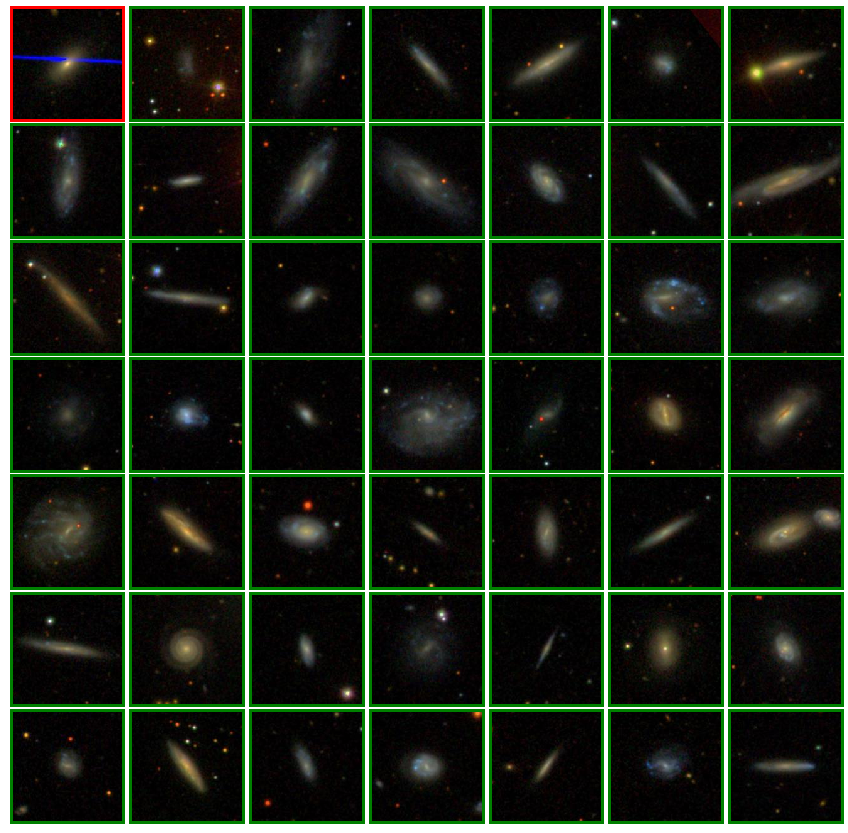

In [48]:
plt.figure(figsize=(15, 15))
subPlotNum = 1
num = 49
counter = 0
print('Spiral Galaxies')
for index,ra,dec,correct,galtype in zip(range(len(validation_data)),validation_data['ra'][lumin_sort],validation_data['dec'][lumin_sort],
                                correctvec[lumin_sort], validation_gal_type[lumin_sort]):
    if galtype != 4: continue
    img=getImStamp(ra,dec)
    plt.subplot(7,7,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)
    ax = plt.gca()
    if correct:
        color = 'green'
    else:
        color = 'red'
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color(color)

    ax.set_xticks([])
    ax.set_yticks([])
    counter += 1
    if counter>=num: 
        break
plt.subplots_adjust(hspace=0.04,wspace=0.01);

Elliptical Galaxies


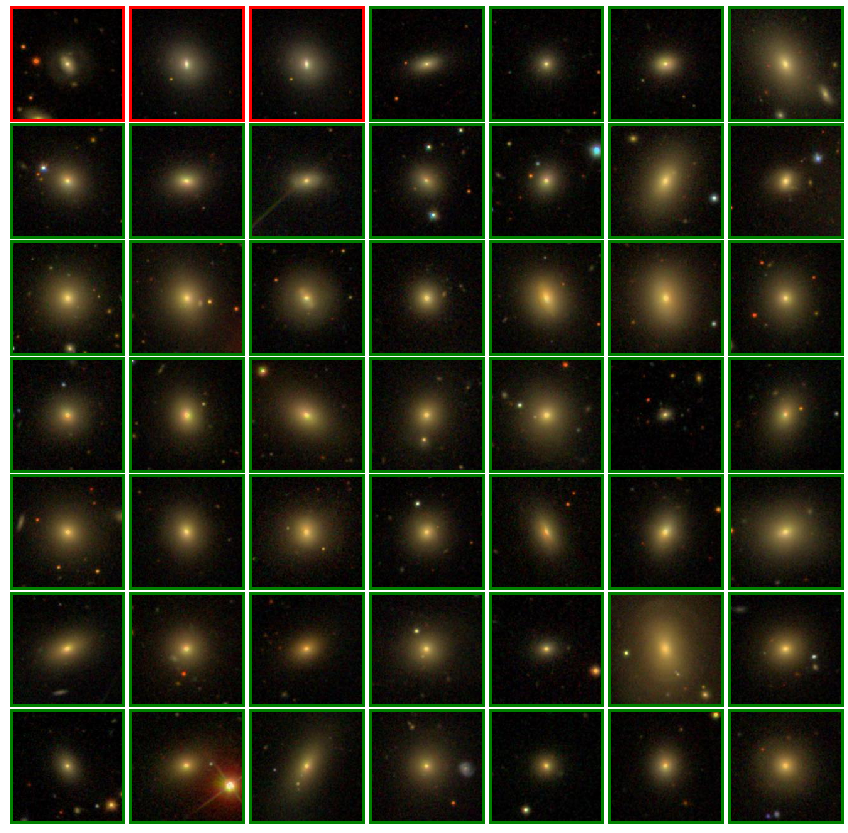

In [49]:
plt.figure(figsize=(15, 15))
subPlotNum = 1
num = 49
counter = 0
print('Elliptical Galaxies')
for index,ra,dec,correct,galtype in zip(range(len(validation_data)),validation_data['ra'][lumin_sort],validation_data['dec'][lumin_sort],
                                correctvec[lumin_sort], validation_gal_type[lumin_sort]):
    if galtype != 1: continue
    img=getImStamp(ra,dec)
    plt.subplot(7,7,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)
    ax = plt.gca()
    if correct:
        color = 'green'
    else:
        color = 'red'
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color(color)

    ax.set_xticks([])
    ax.set_yticks([])
    counter += 1
    if counter>=num: 
        break
plt.subplots_adjust(hspace=0.04,wspace=0.01);

Maybe dont do this part two, could do a part two instead based on a Convoluational NN (image based). I can write this up for you if you want.

## Part 2

The second stage of the project is the same, except we will try to classify the spirals into their two sub-categories, S1 vs S2 (i.e. types 3 vs 4).

In [3]:
import numpy as np

def train_galaxy_predictions_2(gal_type, data, data_g, data_r):
    """
    Use sklearn's AdaBoostClassifier function to fit galaxy data.
    
    Returns the trained model.
    """
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    
    # Take all columns of data array except the first two which are ID and gal_type
    X = np.array(data.tolist())[:, 2:]
    Y = gal_type
    
    model = LinearDiscriminantAnalysis()
    model = model.fit(X, Y)
    
    return model


def validate_galaxy_predictions_2(result, data, data_g, data_r):
    """
    Uses result, a model trained using sklearn's AdaBoostClassifier, and makes predictions.
    
    Returns predictions in an array.
    """
    
    # Take all columns of data array except the first two which are ID and gal_type
    X = np.array(data.tolist())[:, 2:]
    return result.predict(X)

In [4]:
import numpy as np

gal_file_name = 'training_galaxies.dat'
full_g_file_name = 'training_galaxies_full_g.dat'
full_r_file_name = 'training_galaxies_full_r.dat'

gal_data = np.genfromtxt(gal_file_name, names=True, dtype=None)
full_g_data = np.genfromtxt(full_g_file_name, names=True, dtype=None)
full_r_data = np.genfromtxt(full_r_file_name, names=True, dtype=None)

# This time, limit the data to those galaxies with gal_type == 3 or 4
gal_type = gal_data['gal_type'].copy()
type_3_4 = (gal_type == 3) | (gal_type == 4)
gal_data = gal_data[type_3_4]
full_g_data = full_g_data[type_3_4]
full_r_data = full_r_data[type_3_4]
gal_type = gal_type[type_3_4]

# Zero out the gal_type column in the input data, so it can't be used to cheat.  :)
gal_data['gal_type'][:] = 0

# Split up the input into a training and validation set as you want.
# When we run this, we will use the full data arrays as input, and some different (not provided!) data as validation.
###
training_frac = 0.75
nExamples = gal_type.shape[0]
nTrain = int(training_frac * nExamples)
###

training_data = gal_data[:nTrain]
training_data_g = full_g_data[:nTrain]
training_data_r = full_r_data[:nTrain]
training_gal_type = gal_type[:nTrain]
validation_data = gal_data[nTrain:]
validation_data_g = full_g_data[nTrain:]
validation_data_r = full_r_data[nTrain:]
validation_gal_type = gal_type[nTrain:]

from sklearn.model_selection import train_test_split
training_data, validation_data, training_gal_type, validation_gal_type = train_test_split(
    gal_data,
    gal_type,
    test_size=1-training_frac,
    random_state=2019)

# Your function can ignore training_data_g and training_data_r if you don't want to use them.
# But the function signature needs to take 4 values, since we will pass them to your function when we run this.
result = train_galaxy_predictions_2(training_gal_type, training_data, training_data_g, training_data_r)

predicted_gal_type = validate_galaxy_predictions_2(result, validation_data, validation_data_g, validation_data_r)

print('Num correct = ',np.sum(predicted_gal_type == validation_gal_type))
print('Num total = ',len(validation_gal_type))
print('Fraction correct = ',np.sum(predicted_gal_type == validation_gal_type) / len(validation_gal_type))
# Note: It may be helpful to construct a confusion matrix to better quantify how well you are doing here, rather
# than just looking at the overal fraction correct.

Num correct =  239
Num total =  295
Fraction correct =  0.8101694915254237


## Part 3

Finally, in the third stage, we will try to classify all 4 types.

You may find it simpler to do this in two steps.  First separate E and S0 galaxies (aka, types 1 and 2) from spiral galaxies (S1 and S2, aka types 3 and 4).  Then within these two groups classify E vs S0 and S1 vs S2.  This would allow you to use classifiers that are best done on binary classification.  

Or you may want to try to use a classifier that can handle more than 2 types for the target and do the whole process at once.  Or you may find that some other combination of methods is appropriate.

It should be noted that we don't expect you to be able to do a great job separating the E and S0 galaxies from each other.  So don't feel too bad if you aren't getting great results on that part of the classification.  However, we think you should be able to do a decent job separating the other types from each other.

In [5]:
import numpy as np

def train_galaxy_predictions_3(gal_type, data, data_g, data_r):
    """
    Use sklearn's AdaBoostClassifier function to fit galaxy data.
    
    Returns the trained model.
    """
    
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.svm import SVC
    
    # Train model to separate galaxy types EII and S0 from S1 and S2
    X = np.array(data.tolist())[:, 2:]
    Y = gal_type.copy()
    Y[Y == 1], Y[Y == 2], Y[Y == 3], Y[Y == 4] = 0, 0, 1, 1
    model_EII_S0_vs_S1_S2 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
    model_EII_S0_vs_S1_S2 = model_EII_S0_vs_S1_S2.fit(X, Y)
    
    # Train model to separate galaxy types EII from S0
    X = np.array(data.tolist())[:, 2:]
    Y = gal_type.copy()
    sersic = (gal_type == 1) | (gal_type == 2)
    X = X[sersic, :]
    Y = Y[sersic]
    Y[Y == 1], Y[Y == 2] = 0, 1
    model_EII_vs_S0 = SVC(kernel='linear')
    model_EII_vs_S0 = model_EII_vs_S0.fit(X, Y)
    
    # Train model to separate galaxy types S1 from S2
    X = np.array(data.tolist())[:, 2:]
    Y = gal_type.copy()
    sersic = (gal_type == 3) | (gal_type == 4)
    Y[Y == 3], Y[Y == 4] = 0, 1
    X = X[sersic, :]
    Y = Y[sersic]
    
    model_S1_vs_S2 = LinearDiscriminantAnalysis()
    model_S1_vs_S2 = model_S1_vs_S2.fit(X, Y)
    
    return model_EII_S0_vs_S1_S2, model_EII_vs_S0, model_S1_vs_S2

def validate_galaxy_predictions_3(result, data, data_g, data_r):
    """
    Uses result, a model trained using sklearn's AdaBoostClassifier, and makes predictions.
    
    Returns predictions in an array.
    """
    
    X = np.array(data.tolist())[:, 2:]
    
    model_EII_S0_vs_S1_S2, model_EII_vs_S0, model_S1_vs_S2 = result
    
    EII_S0 = model_EII_S0_vs_S1_S2.predict(X) == 0
    S1_S2 = model_EII_S0_vs_S1_S2.predict(X) == 1
    
    X_EII_S0 = X[EII_S0, :]
    X_S1_S2 =  X[S1_S2, :]
    
    Y_EII_S0 = model_EII_vs_S0.predict(X_EII_S0) + 1
    Y_S1_S2 = model_S1_vs_S2.predict(X_S1_S2) + 3
    
    Y_pred = np.zeros(X.shape[0])
    Y_pred[EII_S0] = Y_EII_S0
    Y_pred[S1_S2] = Y_S1_S2
    
    return Y_pred.astype(int)

import numpy as np

gal_file_name = 'training_galaxies.dat'
full_g_file_name = 'training_galaxies_full_g.dat'
full_r_file_name = 'training_galaxies_full_r.dat'

gal_data = np.genfromtxt(gal_file_name, names=True, dtype=None)
full_g_data = np.genfromtxt(full_g_file_name, names=True, dtype=None)
full_r_data = np.genfromtxt(full_r_file_name, names=True, dtype=None)

# Zero out the gal_type column in the input data, so it can't be used to cheat.  :)
gal_type = gal_data['gal_type'].copy()
gal_data['gal_type'][:] = 0

# Split up the input into a training and validation set as you want.
# When we run this, we will use the full data arrays as input, and some different (not provided!) data as validation.
###
training_frac = 0.65
nExamples = gal_type.shape[0]
nTrain = int(training_frac * nExamples)
###

training_data = gal_data[:nTrain]
training_data_g = full_g_data[:nTrain]
training_data_r = full_r_data[:nTrain]
training_gal_type = gal_type[:nTrain]
validation_data = gal_data[nTrain:]
validation_data_g = full_g_data[nTrain:]
validation_data_r = full_r_data[nTrain:]
validation_gal_type = gal_type[nTrain:]

from sklearn.model_selection import train_test_split
training_data, validation_data, training_gal_type, validation_gal_type = train_test_split(
    gal_data,
    gal_type,
    test_size=1-training_frac,
    random_state=2019)

# Your function can ignore training_data_g and training_data_r if you don't want to use them.
# But the function signature needs to take 4 values, since we will pass them to your function when we run this.
result = train_galaxy_predictions_3(training_gal_type, training_data, training_data_g, training_data_r)

predicted_gal_type = validate_galaxy_predictions_3(result, validation_data, validation_data_g, validation_data_r)

print('Num correct = ',np.sum(predicted_gal_type == validation_gal_type))
print('Num total = ',len(validation_gal_type))
print('Fraction correct = ',np.sum(predicted_gal_type == validation_gal_type) / len(validation_gal_type))
# Note: It may be helpful to construct a (4x4) confusion matrix to better quantify how well you are doing here, rather
# than just looking at the overal fraction correct.

Num correct =  545
Num total =  723
Fraction correct =  0.7538035961272476
